In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

In [2]:
# Starting dataset
df = pd.read_csv('customer_dataframe.csv', sep='\t', index_col=0)

selected_features = ['TProd','MeanProdOrder', 'MeanSaleOrder', 'MeanPSale']

df2 = df[selected_features]
df2.head()

,TProd,MeanProdOrder,MeanSaleOrder,MeanPSale
CustomerID,,,,
17850,1702,48.629,151.940,3.960
13047,1355,84.688,193.069,3.926
12583,4978,292.824,389.961,2.140
13748,439,87.800,189.650,3.996
15100,58,9.667,105.850,10.950


In [3]:
df2.describe()

,TProd,MeanProdOrder,MeanSaleOrder,MeanPSale
count,4333.000000,4333.000000,4333.000000,4333.000000
mean,1129.535657,201.104614,327.882896,3.492819
std,4692.695935,274.590134,395.336014,8.997404
min,0.000000,0.000000,-0.000000,0.122000
25%,157.000000,80.500000,155.050000,2.160000
50%,370.000000,140.167000,241.900000,2.834000
75%,971.000000,237.750000,371.560000,3.712000
max,196556.000000,7824.000000,9904.875000,434.650000


# Normalization

In [4]:
scaler = MinMaxScaler()
df_norm = scaler.fit_transform(df2.to_numpy())

# K-MEANS

In [5]:
sse_list = list()
sil_list = list()
davies_list = list()
max_k = 15
for k in tqdm(range(2, max_k + 1), total=max_k - 1, desc="Iterating over possible K values"):
    kmeans_iter = KMeans(n_clusters=k, n_init=10, max_iter=100)
    kmeans_iter.fit(df_norm)
    
    davies_list.append(davies_bouldin_score(df_norm, kmeans_iter.labels_))
    sil_list.append(silhouette_score(df_norm, kmeans_iter.labels_))
    sse = kmeans_iter.inertia_
    sse_list.append(sse)

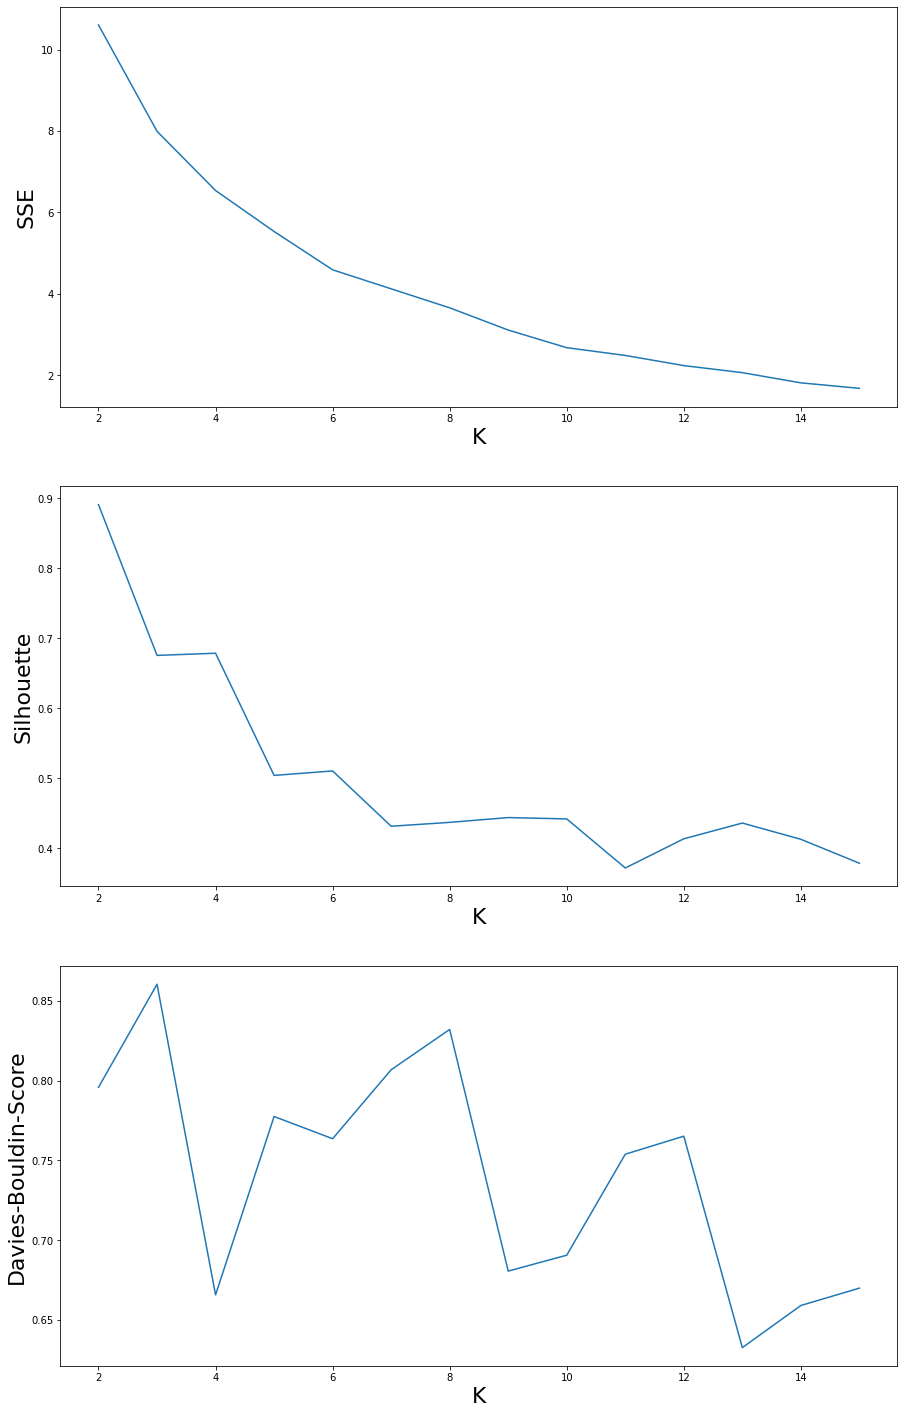

In [6]:
fig, axs = plt.subplots(3,1,figsize=(15,25))
axs[0].plot(range(2, len(sse_list) + 2), sse_list)
axs[0].set_ylabel('SSE', fontsize=22)
axs[0].set_xlabel('K', fontsize=22)
axs[0].tick_params(axis='both', which='major', labelsize=10)

axs[1].plot(range(2, len(sil_list) + 2), sil_list)
axs[1].set_ylabel('Silhouette', fontsize=22)
axs[1].set_xlabel('K', fontsize=22)
axs[1].tick_params(axis='both', which='major', labelsize=10)

axs[2].plot(range(2, len(davies_list) + 2), davies_list)
axs[2].set_ylabel('Davies-Bouldin-Score', fontsize=22)
axs[2].set_xlabel('K', fontsize=22)
axs[2].tick_params(axis='both', which='major', labelsize=10)

In [23]:
k = 4
kmeans = KMeans(n_clusters=k, n_init=100)
kmeans.fit(df_norm)

KMeans(n_clusters=4, n_init=100)

In [24]:
print("SSE:",sse_list[k-2]," - SILHOUETTE:",sil_list[k-2])

SSE: 6.538689611545757  - SILHOUETTE: 0.6785957622596556


In [25]:
hist, bins = np.histogram(kmeans.labels_, 
                          bins=range(0, len(set(kmeans.labels_)) + 1))
clust_dict = dict(zip(bins, hist))

print(clust_dict)

#saving anomalous cluster index
anomalous_cluster = -1

for key, value in dict(zip(bins, hist)).items():
    if value == 1:
        anomalous_cluster = key

{0: 3857, 1: 1, 2: 25, 3: 450}


**We can already start seeing an anomalous cluster, composed only by 1 value, let us analyze more the situation**

Text(0.5, 0, 'MeanSaleOrder')

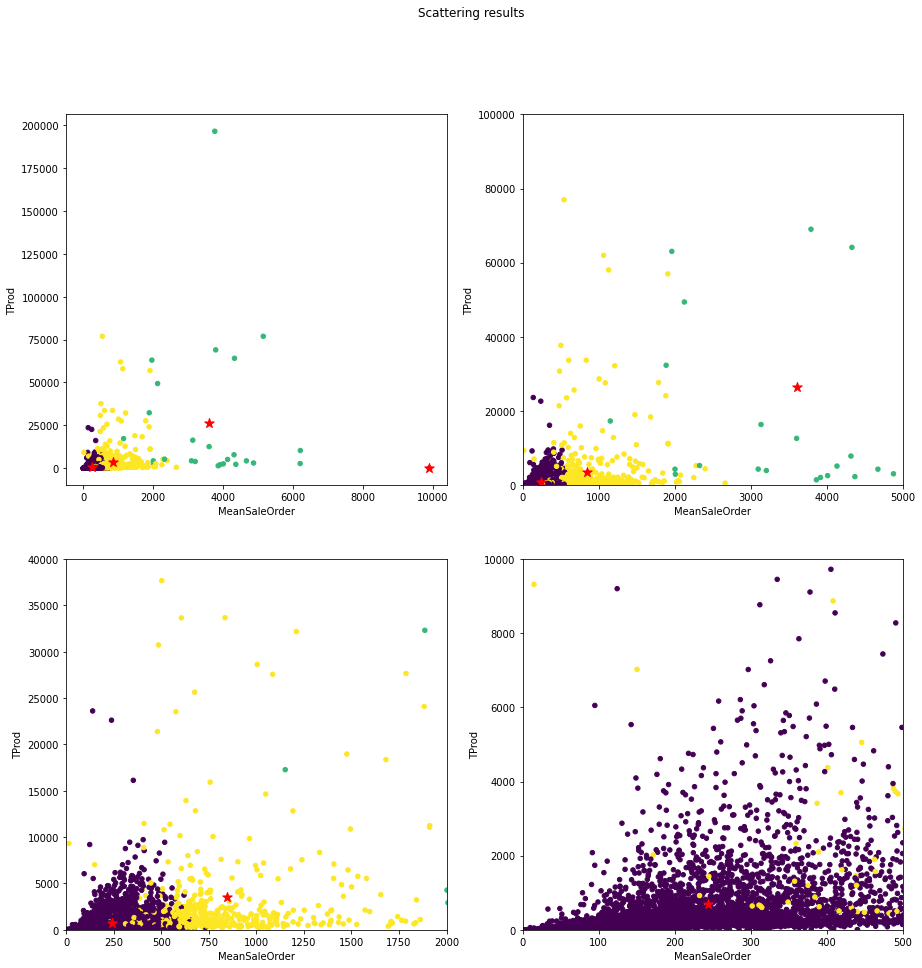

In [26]:
centers = scaler.inverse_transform(kmeans.cluster_centers_)

fig, axs = plt.subplots(2,2,figsize=(15,15))
fig.suptitle('Scattering results')

label_s = 10

col1, i1 = df2['MeanSaleOrder'], 2
col2, i2 = df2['TProd'], 0

axs[0][0].scatter(col1, col2, c=kmeans.labels_, s=20)
axs[0][0].scatter(centers[:, i1], centers[:, i2], s=100, marker='*', c='r')
axs[0][0].tick_params(axis='both', which='major', labelsize=label_s)
axs[0][0].set_ylabel(df2.columns[i2], fontsize=label_s)
axs[0][0].set_xlabel(df2.columns[i1], fontsize=label_s)

axs[0][1].set_xlim((0,5000))
axs[0][1].set_ylim((0,100000))
axs[0][1].scatter(col1, col2, c=kmeans.labels_, s=20)
axs[0][1].scatter(centers[:, i1], centers[:, i2], s=100, marker='*', c='r')
axs[0][1].tick_params(axis='both', which='major', labelsize=label_s)
axs[0][1].set_ylabel(df2.columns[i2], fontsize=label_s)
axs[0][1].set_xlabel(df2.columns[i1], fontsize=label_s)

axs[1][0].set_xlim((0,2000))
axs[1][0].set_ylim((0,40000))
axs[1][0].scatter(col1, col2, c=kmeans.labels_, s=20)
axs[1][0].scatter(centers[:, i1], centers[:, i2], s=100, marker='*', c='r')
axs[1][0].tick_params(axis='both', which='major', labelsize=label_s)
axs[1][0].set_ylabel(df2.columns[i2], fontsize=label_s)
axs[1][0].set_xlabel(df2.columns[i1], fontsize=label_s)

axs[1][1].set_xlim((0,500))
axs[1][1].set_ylim((0,10000))
axs[1][1].scatter(col1, col2, c=kmeans.labels_, s=20)
axs[1][1].scatter(centers[:, i1], centers[:, i2], s=100, marker='*', c='r')
axs[1][1].tick_params(axis='both', which='major', labelsize=label_s)
axs[1][1].set_ylabel(df2.columns[i2], fontsize=label_s)
axs[1][1].set_xlabel(df2.columns[i1], fontsize=label_s)

We can see how the anomalous cluster is well separated and completely on its own

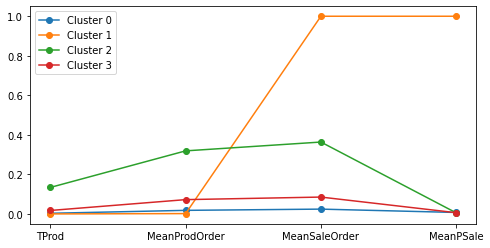

In [27]:
# normalized centers
plt.figure(figsize=(8, 4))
for i in range(0, len(kmeans.cluster_centers_)):
    plt.plot(kmeans.cluster_centers_[i], marker='o', label='Cluster %s' % i)
plt.tick_params(axis='both', which='major', labelsize=label_s)
plt.xticks(range(0, len(df2.columns)), df2.columns, fontsize=label_s)
plt.legend(fontsize=label_s)
plt.show()

We can further appreciate how the anomalous cluster has a completely different approach from the others (which follow more a parabolic like shape)

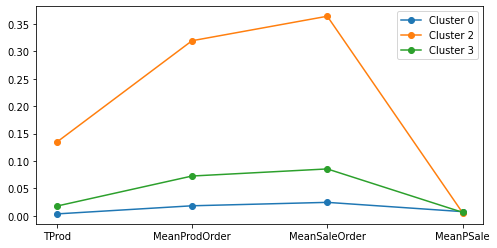

In [28]:
# normalized centers without anomalous cluster
plt.figure(figsize=(8, 4))
for i in range(0, len(kmeans.cluster_centers_)):
    if i != anomalous_cluster:
        plt.plot(kmeans.cluster_centers_[i], marker='o', label='Cluster %s' % i)
plt.tick_params(axis='both', which='major', labelsize=label_s)
plt.xticks(range(0, len(df2.columns)), df2.columns, fontsize=label_s)
plt.legend(fontsize=label_s)
plt.show()

In [29]:
# create column containing cluster label
df['Cluster'] = kmeans.labels_

# create structure containing each single cluster
clust_list = list()
for i in tqdm(range(len(df['Cluster'].unique())), total=len(df['Cluster'].unique()), desc="Creating cluster dataframes"):
    clust_list.append(df[df['Cluster'] == i])

{0: 3857, 1: 1, 2: 25, 3: 450}


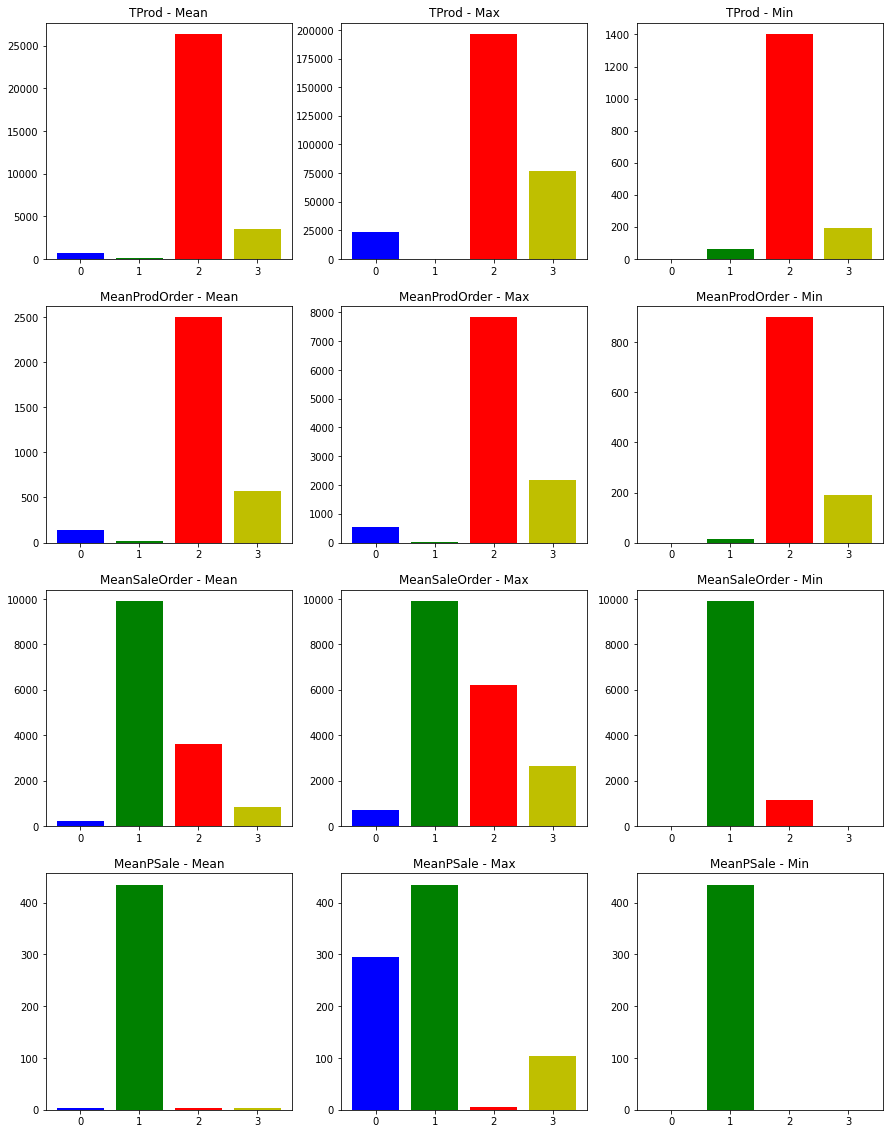

In [30]:
# plot attributes descriptions
attr = df2.columns
clusters = range(len(clust_list))
fig, axs = plt.subplots(len(attr),3,figsize=(15,20))
for attr_index in range(len(attr)):
    mean_values = []
    max_values = []
    min_values = []
    for cluster_df in clust_list:
        mean_values.append(cluster_df.describe()[attr[attr_index]][1])
        max_values.append(cluster_df.describe()[attr[attr_index]][7])
        min_values.append(cluster_df.describe()[attr[attr_index]][3])
    axs[attr_index][0].bar(clusters, mean_values, color = ['b','g','r','y'])
    axs[attr_index][0].set_title(f"{attr[attr_index]} - Mean")
    axs[attr_index][1].bar(clusters, max_values, color = ['b','g','r','y'])
    axs[attr_index][1].set_title(f"{attr[attr_index]} - Max")
    axs[attr_index][2].bar(clusters, min_values, color = ['b','g','r','y'])
    axs[attr_index][2].set_title(f"{attr[attr_index]} - Min")

print(clust_dict)

Since the anomalous cluster is composed by only 1 value it has also anomalous mean values, ruining the analysis

# POST PROCESSING

In [31]:
# taking a peak at this weird cluster
clust_list[anomalous_cluster]

,TProd,DProd,MaxPO,MinPO,MeanProdOrder,TSale,MinPSale,MaxPSale,MeanSaleOrder,TRProd,MeanPSale,TOrder,SETSaleQta,SESaleQtaOrder,Cluster
CustomerID,,,,,,,,,,,,,,,
15098,61,1,60,1,15.25,39619.5,297.0,38970.0,9904.875,60,434.65,3,2.0,2.0,1


In [32]:
# what happens if we try to merge the anomalous cluster with the one most similar to it? 

# saving index for most similar cluster
to_englobe = -1

for key in clust_dict.keys():
    if clust_dict[key] == 25:
        to_englobe = key
        
        
# visualize description of most similar cluster
clust_list[to_englobe].describe()['MeanPSale']

count    25.00000
mean      2.60540
std       1.50657
min       0.40000
25%       1.04800
50%       2.54400
75%       3.34900
max       5.73100
Name: MeanPSale, dtype: float64

In [33]:
# merging two clusters together
clust_list_merge = clust_list[to_englobe].copy()
clust_list_merge = clust_list_merge.append(clust_list[anomalous_cluster])

In [34]:
# visualize description of most similar cluster + anomalous customer
clust_list_merge.describe()['MeanPSale']

count     26.000000
mean      19.222500
std       84.743774
min        0.400000
25%        1.234000
50%        2.647000
75%        3.553000
max      434.650000
Name: MeanPSale, dtype: float64

**We can see how adding this single value alters greatly various descriptive values and this alters the cluster meaning in a non superficial way**

**Decision taken:** drop the anomalous cluster, we can see it as noise bringing no information to the analysis

In [35]:
clust_dict.pop(anomalous_cluster, None)
clust_list.pop(anomalous_cluster)

,TProd,DProd,MaxPO,MinPO,MeanProdOrder,TSale,MinPSale,MaxPSale,MeanSaleOrder,TRProd,MeanPSale,TOrder,SETSaleQta,SESaleQtaOrder,Cluster
CustomerID,,,,,,,,,,,,,,,
15098,61,1,60,1,15.25,39619.5,297.0,38970.0,9904.875,60,434.65,3,2.0,2.0,1


{0: 3857, 2: 25, 3: 450}


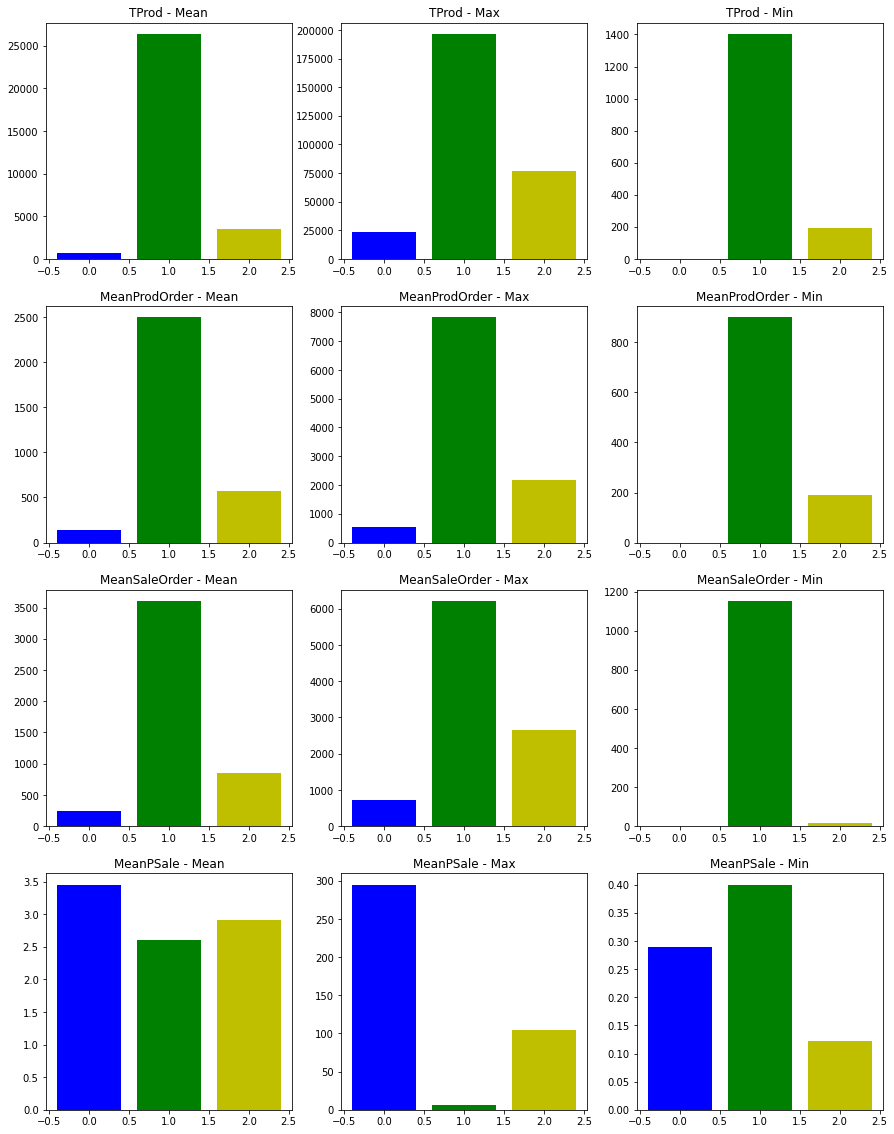

In [36]:
attr = df2.columns
clusters = range(len(clust_list))
fig, axs = plt.subplots(len(attr),3,figsize=(15,20))
for attr_index in range(len(attr)):
    mean_values = []
    max_values = []
    min_values = []
    stdev_values = []
    for cluster_df in clust_list:
        mean_values.append(cluster_df.describe()[attr[attr_index]][1])
        max_values.append(cluster_df.describe()[attr[attr_index]][7])
        min_values.append(cluster_df.describe()[attr[attr_index]][3])
    axs[attr_index][0].bar(clusters, mean_values, color = ['b','g','y'])
    axs[attr_index][0].set_title(f"{attr[attr_index]} - Mean")
    axs[attr_index][1].bar(clusters, max_values, color = ['b','g','y'])
    axs[attr_index][1].set_title(f"{attr[attr_index]} - Max")
    axs[attr_index][2].bar(clusters, min_values, color = ['b','g','y'])
    axs[attr_index][2].set_title(f"{attr[attr_index]} - Min")
print(clust_dict)

# ANALYSIS

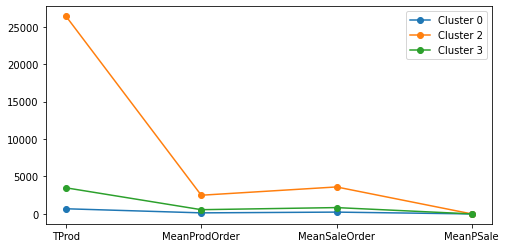

In [37]:
# non normalized centers
plt.figure(figsize=(8, 4))
for i in range(0, len(centers)):
    if i != anomalous_cluster:
        plt.plot(centers[i], marker='o', label='Cluster %s' % i)
plt.tick_params(axis='both', which='major', labelsize=label_s)
plt.xticks(range(0, len(df2.columns)), df2.columns, fontsize=label_s)
plt.legend(fontsize=label_s)
plt.show()

In [38]:
for i in range(0, len(clust_list)):
    print('-'*50,'CLUSTER',i,'-'*50)
    print("\n",clust_list[i].describe()['MeanSaleOrder'])

-------------------------------------------------- CLUSTER 0 --------------------------------------------------

 count    3857.000000
mean      243.539506
std       125.801341
min         0.000000
25%       147.200000
50%       222.101000
75%       325.750000
max       731.520000
Name: MeanSaleOrder, dtype: float64
-------------------------------------------------- CLUSTER 1 --------------------------------------------------

 count      25.000000
mean     3603.479040
std      1326.661174
min      1152.000000
25%      2325.680000
50%      3789.815000
75%      4327.622000
max      6212.725000
Name: MeanSaleOrder, dtype: float64
-------------------------------------------------- CLUSTER 2 --------------------------------------------------

 count     450.000000
mean      847.539696
std       380.102599
min        14.938000
25%       615.823500
50%       738.780000
75%      1001.193750
max      2661.240000
Name: MeanSaleOrder, dtype: float64
